In [3]:
import xarray as xr
import pyorc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Scanning video: 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]


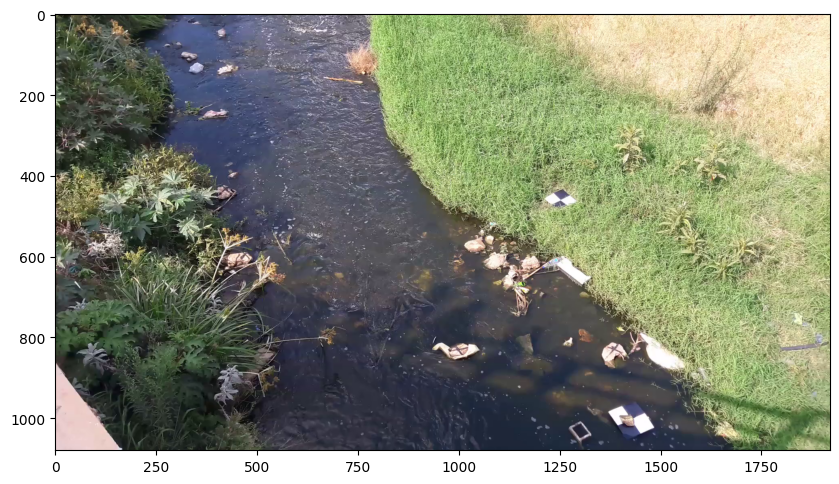

In [4]:
# uncomment line below if you want to view coordinates interactively
#%matplotlib notebook
video_file = "ngwerere_20191103.mp4"
video = pyorc.Video(video_file, start_frame=0, end_frame=1)  # we only need one frame
frame = video.get_frame(0, method="rgb")

# plot frame on a notebook-style window
f = plt.figure(figsize=(10, 6))
plt.imshow(frame)


In [5]:
%matplotlib inline
gcps = dict(
    src=[
        [1421, 1001],
        [1251, 460],
        [421, 432],
        [470, 607]
    ]
)

'''f = plt.figure(figsize=(16, 9))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.legend()'''


'f = plt.figure(figsize=(16, 9))\nplt.imshow(frame)\nplt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")\nplt.legend()'

In [6]:
# first add our UTM 35S coordinates. This MUST be in precisely the same order as the src coordinates.
gcps["dst"] = [
    [642735.8076, 8304292.1190],  # lowest right coordinate
    [642737.5823, 8304295.593],  # highest right coordinate
    [642732.7864, 8304298.4250],  # highest left coordinate
    [642732.6705, 8304296.8580]  # highest right coordinate
]

# # if we would use this video as survey in video, the lines below are also needed, 
# # and proper values need to be filled in. They are now commented out.
# gcps["h_ref"] = <your locally measured water level during survey in>
gcps["z_0"] = 1182.2

# set the height and width
height, width = frame.shape[0:2]

# now we use everything to make a camera configuration
cam_config = pyorc.CameraConfig(height=height, width=width, gcps=gcps, crs=32735)


Below we make a quick plot. Cartopy is used to make the plot geographically aware. We use GoogleTiles, using the satellite style, to get some awareness of the surroundings.

In [7]:
#ax = cam_config.plot(tiles="GoogleTiles", tiles_kwargs={"style": "satellite"})


In [8]:
corners = [
    [292, 817],
    [50, 166],
    [1200, 236],
    [1600, 834]
]
cam_config.set_bbox_from_corners(corners)
cam_config.resolution = 0.01
cam_config.window_size = 25

In [9]:

'''f = plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.plot(*zip(*corners), "co", label="Corners of AOI")
plt.legend()
'''

'f = plt.figure(figsize=(10, 6))\nplt.imshow(frame)\nplt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")\nplt.plot(*zip(*corners), "co", label="Corners of AOI")\nplt.legend()\n'

Now that all information is entered, we show the final camera configuration as a plot, both in geographical projection and in camera perspective. The rectangular box can be clearly seen now.

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_22104\1336378032.py:8: DeprecationWarning: The camera=True option is deprecated, use mode='camera' instead. This option will be removed in a future release.
  cam_config.plot(ax=ax2, camera=True)


<Axes: xlabel='column [-]', ylabel='row [-]'>

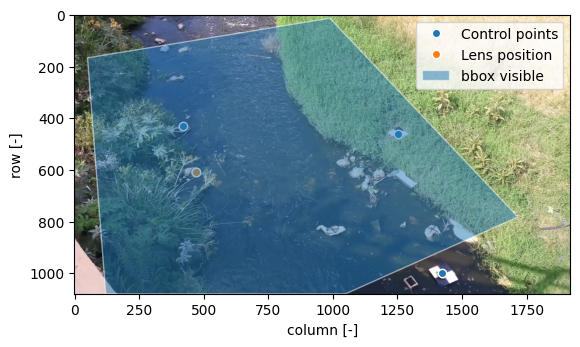

In [10]:
%matplotlib inline

# ax1 = cam_config.plot(tiles="GoogleTiles", tiles_kwargs={"style": "satellite"})

f = plt.figure()
ax2 = plt.axes()
ax2.imshow(frame)
cam_config.plot(ax=ax2, camera=True)

#plt.savefig("ngwerere_camconfig.jpg", bbox_inches="tight", dpi=72)

To better grasp the perspective and the situation, a 3D plot may be very useful. The camera configuration has a powerful 3D plotting method.

In [11]:
'''# for interactive plotting, please install ipython matplotlib e.g. through `pip install ipympl`. You may need additional requirements, see https://matplotlib.org/ipympl/installing.html
# then uncomment the line below.
%matplotlib inline
plt.close("all")
f = plt.figure(figsize=(12, 7))
ax = f.add_subplot(projection="3d")
cam_config.plot(mode="3d", ax=ax)
ax.set_aspect("equal")'''

'# for interactive plotting, please install ipython matplotlib e.g. through `pip install ipympl`. You may need additional requirements, see https://matplotlib.org/ipympl/installing.html\n# then uncomment the line below.\n%matplotlib inline\nplt.close("all")\nf = plt.figure(figsize=(12, 7))\nax = f.add_subplot(projection="3d")\ncam_config.plot(mode="3d", ax=ax)\nax.set_aspect("equal")'

Our camera configuration is ready. Below we still show a string representation and then we store the configuration to a file for use in our next notebook using the `.to_file` method.

In [12]:
print(cam_config)
cam_config.to_file("ngwerere.json")

{
    "height": 1080,
    "width": 1920,
    "crs": "PROJCRS[\"WGS 84 / UTM zone 35S\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],MEMBER[\"World Geodetic System 1984 (G2296)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"UTM zone 35S\",METHOD[\"Transverse Mercator\",ID[\"EPSG\",9807]],PARAMETER[\"Latitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8801]],PARAMETER[\"Longitude of natural origin\",27,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARA